# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
!pip install citipy

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#from pprint import pprint 
#from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [138]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [139]:
api_key=weather_api_key
weather_api_key
#api_key

city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Date': "",'Humidity': "", 'Lat': "", 'Lng': ""})
city_weather.head(5)

,City,Cloudiness,Date,Humidity,Lat,Lng
0,sonqor,,,,,
1,hermanus,,,,,
2,busselton,,,,,
3,monteagudo,,,,,
4,jumla,,,,,


In [140]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units= 'imperial'
query = f"{url}appid={weather_api_key}&units={units}&q=" 
response = requests.get(query + city).json()
response

{'coord': {'lon': 147.0587, 'lat': -42.7826},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 56.21,
  'feels_like': 52.27,
  'temp_min': 52,
  'temp_max': 59,
  'pressure': 1029,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 73, 'gust': 5.99},
 'clouds': {'all': 63},
 'dt': 1611788546,
 'sys': {'type': 3,
  'id': 2031307,
  'country': 'AU',
  'sunrise': 1611774507,
  'sunset': 1611826838},
 'timezone': 39600,
 'id': 2155415,
 'name': 'New Norfolk',
 'cod': 200}

In [141]:
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]
max_temp = []
lat =[]
lng =[]
#cities_list = []
city_two = []

    

In [144]:
count_one = 0
set_one = 1

for city in cities:
    city_url = url + '&q=' + city.replace(' ','+')
    #print(f'Processing City # {counter} | {city}')

    try:
        response = requests.get(query + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        #dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 1501:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | sonqor
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | monteagudo
Processing Record 5 of Set 1 | jumla
Processing Record 6 of Set 1 | rikitea
City not found. Skipping...
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | flin flon
Processing Record 10 of Set 1 | fairbanks
Processing Record 11 of Set 1 | biskamzha
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | usinsk
Processing Record 15 of Set 1 | chateau-gontier
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | stornoway
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | port alfred
City not found. Skipping...
Processing Record 22 of Set 1 | lensk
Processing Record 23 of Set 1 | camopi
Processing 

Processing Record 185 of Set 1 | siwana
Processing Record 186 of Set 1 | marsa matruh
Processing Record 187 of Set 1 | richards bay
Processing Record 188 of Set 1 | fortuna
Processing Record 189 of Set 1 | nome
Processing Record 190 of Set 1 | sao felix do xingu
Processing Record 191 of Set 1 | high level
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 192 of Set 1 | ewa beach
Processing Record 193 of Set 1 | ilulissat
Processing Record 194 of Set 1 | mayo
Processing Record 195 of Set 1 | lorengau
Processing Record 196 of Set 1 | penzance
Processing Record 197 of Set 1 | oranjemund
Processing Record 198 of Set 1 | ulaangom
Processing Record 199 of Set 1 | souillac
Processing Record 200 of Set 1 | mar del plata
City not found. Skipping...
Processing Record 201 of Set 1 | baykit
City not found. Skipping...
Processing Record 202 of Set 1 | chara
Processing Record 203 of Set 1 | new glasgow
Processing Record 204 of Set 1 | araguacu
Proc

Processing Record 360 of Set 1 | severobaykalsk
Processing Record 361 of Set 1 | changji
Processing Record 362 of Set 1 | kirakira
Processing Record 363 of Set 1 | zdvinsk
City not found. Skipping...
Processing Record 364 of Set 1 | mount gambier
Processing Record 365 of Set 1 | vestmanna
Processing Record 366 of Set 1 | tarakan
Processing Record 367 of Set 1 | odesa
Processing Record 368 of Set 1 | ust-maya
Processing Record 369 of Set 1 | sao jose da coroa grande
Processing Record 370 of Set 1 | fort smith
Processing Record 371 of Set 1 | laguna
Processing Record 372 of Set 1 | cosala
Processing Record 373 of Set 1 | kendari
Processing Record 374 of Set 1 | jamame
Processing Record 375 of Set 1 | tamandare
Processing Record 376 of Set 1 | beyneu
Processing Record 377 of Set 1 | dingle
Processing Record 378 of Set 1 | agdas
Processing Record 379 of Set 1 | ulladulla
Processing Record 380 of Set 1 | mattru
Processing Record 381 of Set 1 | broome
Processing Record 382 of Set 1 | san cri

Processing Record 544 of Set 1 | novosheshminsk
City not found. Skipping...
Processing Record 545 of Set 1 | bantul
Processing Record 546 of Set 1 | morant bay
City not found. Skipping...
Processing Record 547 of Set 1 | rawson
Processing Record 548 of Set 1 | cockburn town
City not found. Skipping...
Processing Record 549 of Set 1 | formosa
Processing Record 550 of Set 1 | svetlyy
Processing Record 551 of Set 1 | atasu
Processing Record 552 of Set 1 | karratha
Processing Record 553 of Set 1 | lasa
Processing Record 554 of Set 1 | mehamn
Processing Record 555 of Set 1 | jinka
Processing Record 556 of Set 1 | along
Processing Record 557 of Set 1 | west bay
Processing Record 558 of Set 1 | darayya
Processing Record 559 of Set 1 | shetpe


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [145]:
weather_df = pd.DataFrame({
     'City':city_two,
     'Cloudiness':cloudiness,
     #'Country':country,
     #'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()
weather_df.to_csv('../output_data/cities.csv', encoding="utf-8", index=False)
weather_df

,City,Cloudiness,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,sonqor,0,51,34.7837,47.6004,35.60,3.06
1,hermanus,42,89,-34.4187,19.2345,55.99,8.75
2,busselton,0,81,-33.6500,115.3333,55.00,1.99
3,monteagudo,40,65,-19.8167,-63.9833,80.60,2.95
4,jumla,0,40,29.2747,82.1838,32.23,4.92
...,...,...,...,...,...,...,...
1672,jinka,7,34,5.6500,36.6500,66.47,2.13
1673,along,0,67,28.1667,94.7667,49.48,1.79
1674,west bay,1,43,31.8024,-97.0917,53.60,10.36
1675,darayya,20,71,33.4590,36.2374,46.40,17.27


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [146]:
#  Get the indices of cities that have humidity over 100%.


In [147]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [157]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.25,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-100,100)
    plt.ylim(min(weather_df[y])-20,max(weather_df[y])+120)

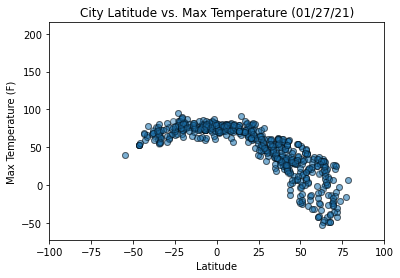

In [158]:
lat_temp = plot_lat(y='Max Temperature',y_label='Max Temperature (F)')
lat_temp

## Latitude vs. Humidity Plot

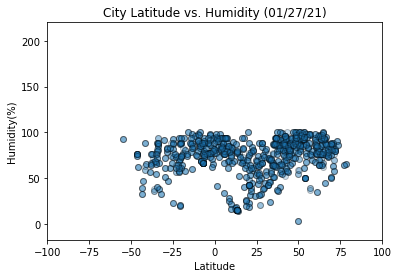

In [159]:
lat_humidity = plot_lat(y='Humidity',y_label='Humidity(%)')
lat_humidity

## Latitude vs. Cloudiness Plot

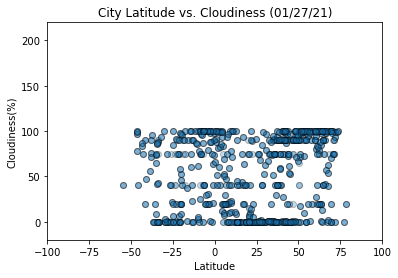

In [160]:
lat_cloud = plot_lat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

## Latitude vs. Wind Speed Plot

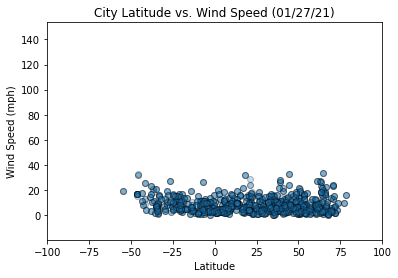

In [161]:
lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind


## Linear Regression

In [162]:
north_hem= weather_df .loc[(weather_df ['Lat']>=0) & (weather_df ['Lat']<=90)]
south_hem= weather_df .loc[(weather_df ['Lat']>=-90) & (weather_df ['Lat']<=0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7138135460656972


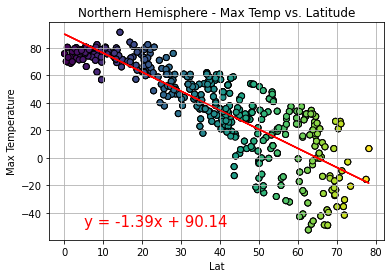

In [163]:
x_values = north_hem['Lat']
y_values = north_hem['Max Temperature']
# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
# Title, x label and y label
plt.xlabel('Lat')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.grid(zorder = 0)
# Print r value
print(f"The r-squared is: {rvalue**2}")
# Display scatter plot with equation and line
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2823286546219627


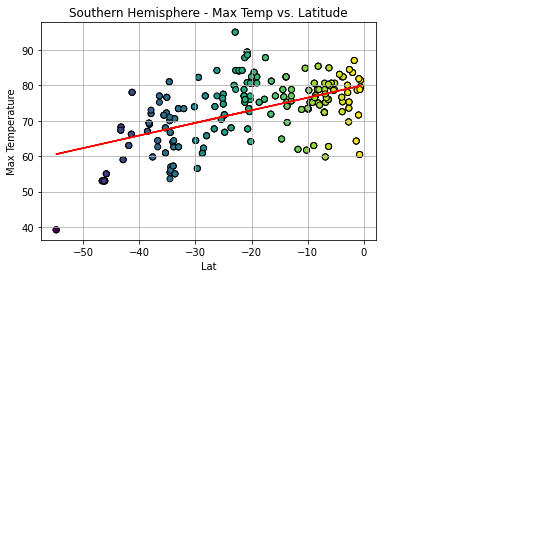

In [164]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temperature']
# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
# Title, x label and y label
plt.xlabel('Lat')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.grid(zorder = 0)
# Print r value
print(f"The r-squared is: {rvalue**2}")
# Display scatter plot with equation and line
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07876328378660848


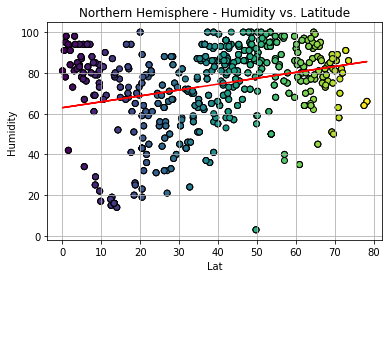

In [165]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']
# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
# Title, x label and y label
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.grid(zorder = 0)
# Print r value
print(f"The r-squared is: {rvalue**2}")
# Display scatter plot with equation and line
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11461063274285505


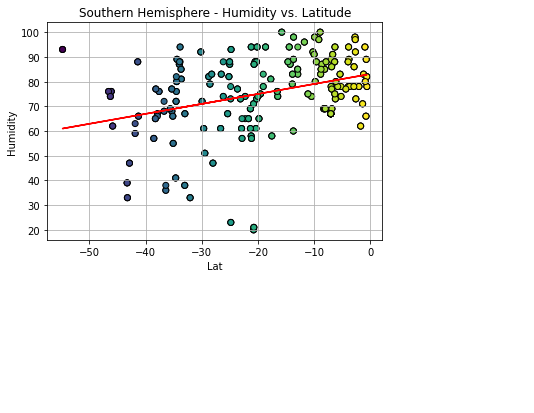

In [166]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']
# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
# Title, x label and y label
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.grid(zorder = 0)
# Print r value
print(f"The r-squared is: {rvalue**2}")
# Display scatter plot with equation and line
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09705046861213999


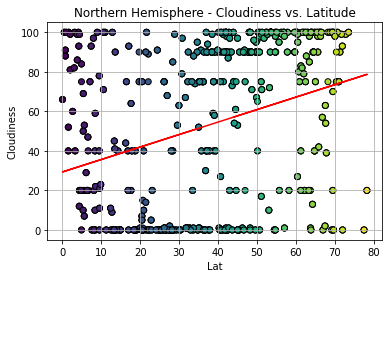

In [167]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
# Title, x label and y label
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.grid(zorder = 0)
# Print r value
print(f"The r-squared is: {rvalue**2}")
# Display scatter plot with equation and line
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03635292165311039


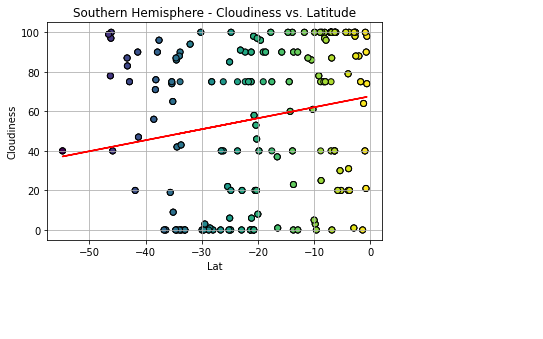

In [168]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']
# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
# Title, x label and y label
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.grid(zorder = 0)
# Print r value
print(f"The r-squared is: {rvalue**2}")
# Display scatter plot with equation and line
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005119889411947001


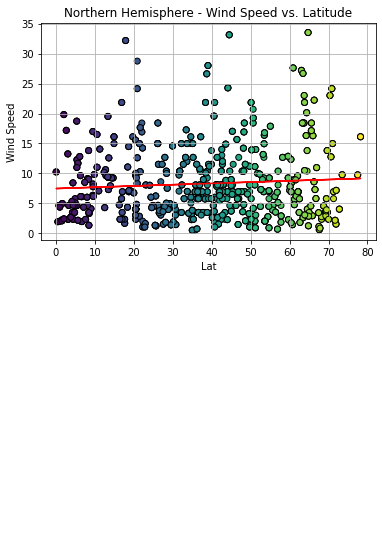

In [169]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']
# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
# Title, x label and y label
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.grid(zorder = 0)
# Print r value
print(f"The r-squared is: {rvalue**2}")
# Display scatter plot with equation and line
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16652505154083957


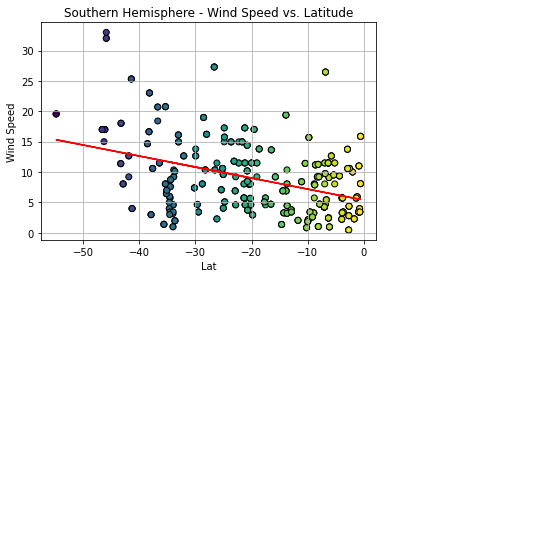

In [170]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']
# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
# Title, x label and y label
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.grid(zorder = 0)
# Print r value
print(f"The r-squared is: {rvalue**2}")
# Display scatter plot with equation and line
plt.show()